In [84]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import math

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
df = pd.read_csv('Data/train.csv', encoding='utf-8')

In [56]:
labels = pd.read_csv('Data/labels.csv', encoding='utf-8')

In [23]:
data = pd.concat([df, labels], axis=1)

In [25]:
cm = data.corr()

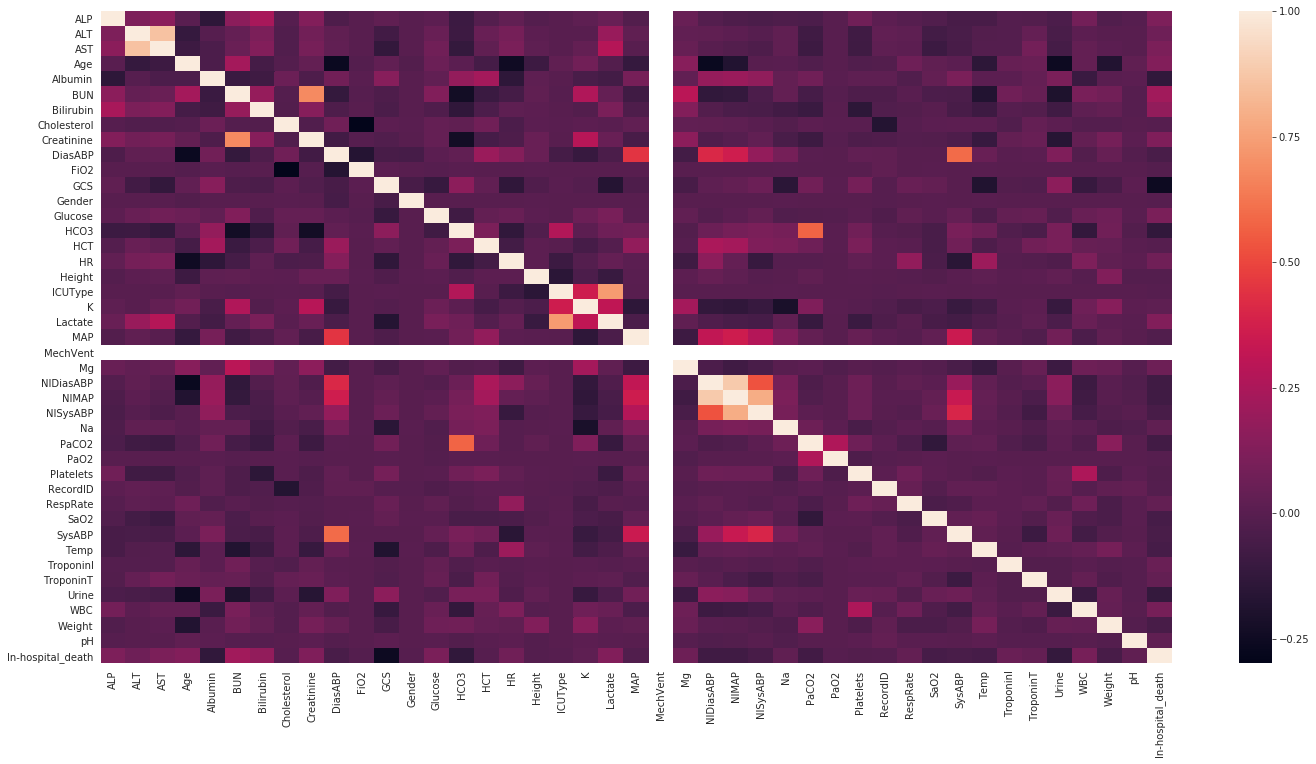

In [30]:
plt.figure(figsize=(24,12))
sns.heatmap(cm)

In [39]:
low_corelated = [var for var in cm.columns if abs(cm[var]['In-hospital_death']) < 0.1]
len(low_corelated)

29

In [40]:
new_df = data.drop(['Gender', 'Cholesterol', 'HCT', 'ICUType', 'Height', 'In-hospital_death'], axis=1)

In [45]:
scaler = MinMaxScaler(feature_range=(0,1))
new_df = scaler.fit_transform(new_df)

In [64]:
encoded = OneHotEncoder()
encoded_labels = encoded.fit_transform(labels)

In [69]:
type(encoded_labels)

scipy.sparse.csr.csr_matrix

In [70]:
X_train, X_test, y_train, y_test = train_test_split(new_df, encoded_labels,
                                                    test_size=0.1,
                                                    random_state=42)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3599, 37), (400, 37), (3599, 2), (400, 2))

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

Using TensorFlow backend.


In [50]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                2432      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 196)               25284     
_________________________________________________________________
dense_12 (Dense)             (None, 196)               38612     
_________________________________________________________________
batch_normalization_2 (Batch (None, 196)               784       
_________________________________________________________________
dense_13 (Dense)             (None, 256)               50432     
__________

In [80]:
history = model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))

Train on 3599 samples, validate on 400 samples
Epoch 1/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.0427 - acc: 0.9844

2432/3599 [===================>..........] - ETA: 0s - loss: 0.0552 - acc: 0.9821

3599/3599 [==============================] - 0s 28us/step - loss: 0.0536 - acc: 0.9831 - val_loss: 0.8528 - val_acc: 0.8400


Epoch 2/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.0436 - acc: 0.9727

2176/3599 [=================>............] - ETA: 0s - loss: 0.0588 - acc: 0.9766

3599/3599 [==============================] - 0s 27us/step - loss: 0.0626 - acc: 0.9754 - val_loss: 0.8165 - val_acc: 0.8500


Epoch 3/15


 128/3599 [>.............................] - ETA: 0s - loss: 0.0498 - acc: 0.9922

2176/3599 [=================>............] - ETA: 0s - loss: 0.0477 - acc: 0.9807

3599/3599 [==============================] - 0s 25us/step - loss: 0.0474 - acc: 0.9824 - val_loss: 0.8399 - val_acc: 0.8562


Epoch 4/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.0524 - acc: 0.9688

1152/3599 [========>.....................] - ETA: 0s - loss: 0.0301 - acc: 0.9918

2560/3599 [====================>.........] - ETA: 0s - loss: 0.0332 - acc: 0.9893

3599/3599 [==============================] - 0s 42us/step - loss: 0.0328 - acc: 0.9893 - val_loss: 0.8759 - val_acc: 0.8450


Epoch 5/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.0543 - acc: 0.9922

2176/3599 [=================>............] - ETA: 0s - loss: 0.0301 - acc: 0.9922

3599/3599 [==============================] - 0s 26us/step - loss: 0.0275 - acc: 0.9936 - val_loss: 0.9631 - val_acc: 0.8225


Epoch 6/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.0241 - acc: 1.0000

2432/3599 [===================>..........] - ETA: 0s - loss: 0.0238 - acc: 0.9953

3599/3599 [==============================] - 0s 25us/step - loss: 0.0254 - acc: 0.9947 - val_loss: 0.9253 - val_acc: 0.8250


Epoch 7/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.0142 - acc: 1.0000

2048/3599 [================>.............] - ETA: 0s - loss: 0.0298 - acc: 0.9917

3599/3599 [==============================] - 0s 29us/step - loss: 0.0295 - acc: 0.9924 - val_loss: 0.9246 - val_acc: 0.8462


Epoch 8/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.0234 - acc: 0.9922

2048/3599 [================>.............] - ETA: 0s - loss: 0.0257 - acc: 0.9934

3599/3599 [==============================] - 0s 28us/step - loss: 0.0287 - acc: 0.9922 - val_loss: 0.9251 - val_acc: 0.8300


Epoch 9/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.0204 - acc: 0.9961

2048/3599 [================>.............] - ETA: 0s - loss: 0.0379 - acc: 0.9885

3599/3599 [==============================] - 0s 29us/step - loss: 0.0330 - acc: 0.9908 - val_loss: 0.9097 - val_acc: 0.8287


Epoch 10/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.0082 - acc: 1.0000

1920/3599 [===============>..............] - ETA: 0s - loss: 0.0313 - acc: 0.9901

3599/3599 [==============================] - 0s 29us/step - loss: 0.0335 - acc: 0.9892 - val_loss: 1.0935 - val_acc: 0.8175


Epoch 11/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.0903 - acc: 0.9688

1920/3599 [===============>..............] - ETA: 0s - loss: 0.0354 - acc: 0.9865

3599/3599 [==============================] - 0s 29us/step - loss: 0.0317 - acc: 0.9901 - val_loss: 0.9717 - val_acc: 0.8387


Epoch 12/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.0701 - acc: 0.9844

2048/3599 [================>.............] - ETA: 0s - loss: 0.0318 - acc: 0.9910

3599/3599 [==============================] - 0s 29us/step - loss: 0.0287 - acc: 0.9904 - val_loss: 1.0383 - val_acc: 0.8325


Epoch 13/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.0421 - acc: 0.9844

1792/3599 [=============>................] - ETA: 0s - loss: 0.0596 - acc: 0.9794

3599/3599 [==============================] - 0s 32us/step - loss: 0.0650 - acc: 0.9757 - val_loss: 0.9172 - val_acc: 0.8363


Epoch 14/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.1131 - acc: 0.9453

2048/3599 [================>.............] - ETA: 0s - loss: 0.0623 - acc: 0.9724

3599/3599 [==============================] - 0s 28us/step - loss: 0.0678 - acc: 0.9714 - val_loss: 0.8073 - val_acc: 0.8375


Epoch 15/15
 128/3599 [>.............................] - ETA: 0s - loss: 0.0574 - acc: 0.9844

2176/3599 [=================>............] - ETA: 0s - loss: 0.0420 - acc: 0.9858

3599/3599 [==============================] - 0s 28us/step - loss: 0.0379 - acc: 0.9875 - val_loss: 0.8847 - val_acc: 0.8575


In [81]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


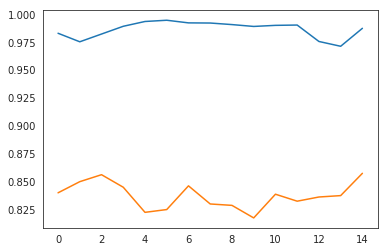

In [82]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

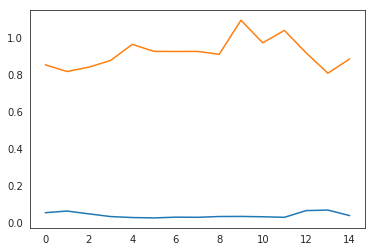

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [85]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)  

In [86]:
print(accuracy_score(y_true, pred))

0.8575


In [87]:
cnf_matrix = confusion_matrix(y_true, pred)
print(cnf_matrix)

[[321  25]
 [ 32  22]]
